<a href="https://colab.research.google.com/github/HebertGomez-SB/aws-lambda-api/blob/master/CleanDataAppraisal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalar librerías
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00


# Preparación y limpieza de datos

In [68]:
import pandas as pd
import ftfy
import numpy as np

file_path = 'train_precios_vivienda.csv'  # Ruta del archivo CSV
df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)

# Eliminar la columna en la primera posición (col_0)
df.drop(df.columns[0], axis=1, inplace=True)

# Función para identificar, corregir texto mal codificado y convertir a minúsculas
def correct_encoding(text):
    if isinstance(text, str) and any(char in text for char in 'Ã©Ã¡Ã­Ã³ÃºÃ±â'):
        text = ftfy.fix_text(text)
    if isinstance(text, str):  # Verifica si el valor es una cadena de texto
        return text.lower().strip()  # Convierte a minúsculas y elimina espacios
    else:
        return text  # Devuelve el valor original si no es una cadena de texto


# Aplicar la corrección y conversión a minúsculas a todas las columnas de tipo 'object' (string)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(correct_encoding)

# Eliminar las filas donde valor_total_avaluo sea 0
df['valor_total_avaluo'] = pd.to_numeric(df['valor_total_avaluo'].str.replace(',', ''), errors='coerce')
df = df[df['valor_total_avaluo'] != 0]

# Convertir automáticamente los valores "si" y "no" en 1 y 0 respectivamente, y convertir la columna a tipo numérico
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col].replace({"si": 1, "no": 0, "aplica": 1, "no aplica": 0}), errors='coerce')
        except ValueError:
            df[col] = np.nan



# Guardar el DataFrame limpio a un nuevo archivo CSV
df.to_csv('train_precios_vivienda_clean.csv', index=False)

print("Datos limpiados, normalizados, convertidos a minúsculas y valores 'si' y 'no' convertidos a 1 y 0 automáticamente.")



Datos limpiados, normalizados, convertidos a minúsculas y valores 'si' y 'no' convertidos a 1 y 0 automáticamente.


In [69]:
df.head()

,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,5896,43090.624747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0,0.0,1.453188e+10,2.522304e+06,NaN,0.000000,0.000000
1,10570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,157.0,78500000.0,0,0.0,7.139867e+08,2.572325e+02,2775647.14,-75.661152,4.544027
2,14600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1,0.0,2.705000e+08,2.594264e+02,1042684.94,-75.584116,6.277020
3,5967,43091.676139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0,0.0,8.484000e+09,2.522450e+05,NaN,0.000000,0.000000
4,15814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69306400.0,0.0,0.0,0,0.0,9.634640e+07,2.597277e+02,370951.58,-73.712370,3.565757


In [70]:

# Leer el archivo CSV (ajusta la ruta al archivo según sea necesario)
file_path = 'train_precios_vivienda_clean.csv'
df = pd.read_csv(file_path)
tipos_de_datos = df.dtypes
conteo_tipos_de_datos = tipos_de_datos.value_counts()
print(conteo_tipos_de_datos)
''' print(df.iloc[:, 67]) '''
columnas_indices = [56,160,185,186,188]
tipo_dato_gas_sector = df['gas_en_el_sector'].dtype
''' print("Tipo de dato de la columna 'gas_en_el_sector':", tipo_dato_gas_sector) '''
nombres_columnas = [df.columns[idx] for idx in columnas_indices]
''' print(df.loc[df['id'] == 485]) '''
''' print(nombres_columnas) '''
''' df.head(100) '''
# Agrupar los valores de la columna "gas_en_el_sector" y contar la frecuencia de cada grupo
''' grupo_gas_sector = df['gas_en_el_sector'].value_counts() '''

# Mostrar el resultado
''' print(grupo_gas_sector) '''

float64    126
int64       95
Name: count, dtype: int64


' print(grupo_gas_sector) '

In [64]:
import pandas as pd

# Supongamos que tienes un DataFrame df con las columnas especificadas
# df = pd.read_csv('tu_archivo.csv')

# Lista de columnas a procesar
columnas_a_procesar = [109,110,160,178,180]

for columna_idx in columnas_a_procesar:
    # Convertir la columna a tipo de dato 'object'
    df.iloc[:, columna_idx] = df.iloc[:, columna_idx].astype(str)

    # Contar la frecuencia de cada tipo de dato en la columna
    frecuencia_tipos_dato = df.iloc[:, columna_idx].value_counts()

    # Obtener el tipo de dato más frecuente
    tipo_dato_mas_frecuente = frecuencia_tipos_dato.idxmax()

    # Imprimir el tipo de dato más frecuente para la columna actual
    print(f"El tipo de dato más frecuente en la columna {columna_idx} es: {tipo_dato_mas_frecuente}")

    # Ahora puedes limpiar los valores que no se ajustan al tipo de dato predominante en la columna


El tipo de dato más frecuente en la columna 109 es: 1
El tipo de dato más frecuente en la columna 110 es: 1
El tipo de dato más frecuente en la columna 160 es: 0
El tipo de dato más frecuente en la columna 178 es: 0
El tipo de dato más frecuente en la columna 180 es: 0


In [60]:
file_path = 'train_precios_vivienda_clean.csv'
df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)

# Seleccionar la columna 'departamento_inmueble' y aplicar value_counts()
municipio_counts = df['municipio_inmueble'].value_counts()

# Crear un DataFrame a partir de la serie de value_counts()
tabla_municipios = pd.DataFrame({'municipio': municipio_counts.index, 'cantidad': municipio_counts.values})

# Opcional: Ordenar el DataFrame por frecuencia en orden descendente
tabla_municipios = tabla_municipios.sort_values(by='cantidad', ascending=False)

# Mostrar la tabla de frecuencia de municipios
''' print(tabla_municipios) '''

column_name = 'valor_total_avaluo'

column_position = df.columns.get_loc(column_name)

# Obtener el tipo de columna
column_dtype = df[column_name].dtype

print("La posición de la columna '{}' es: {}".format(column_name, column_position))
print("El tipo de columna '{}' es: {}".format(column_name, column_dtype))

La posición de la columna 'valor_total_avaluo' es: 216
El tipo de columna 'valor_total_avaluo' es: float64


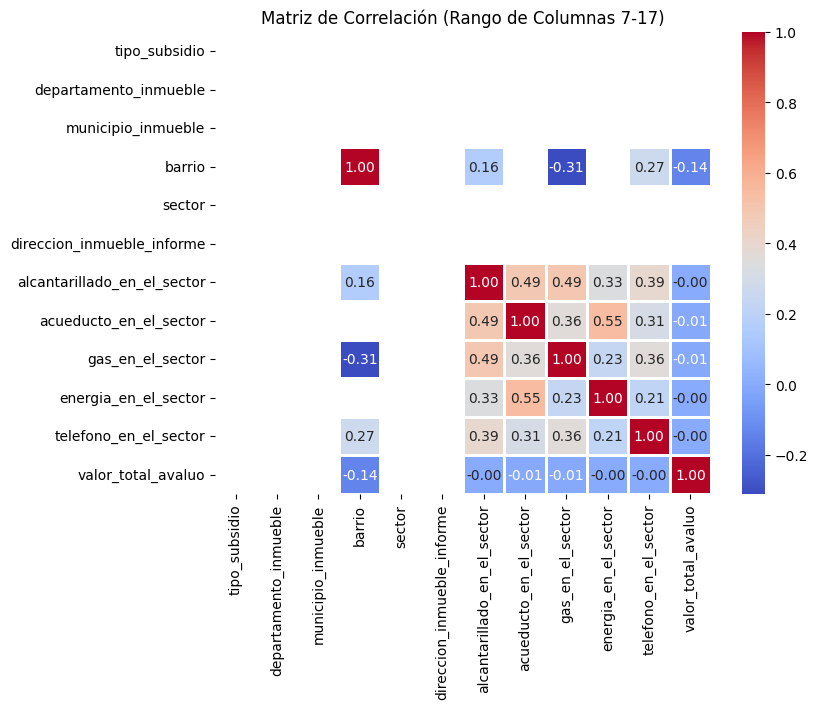

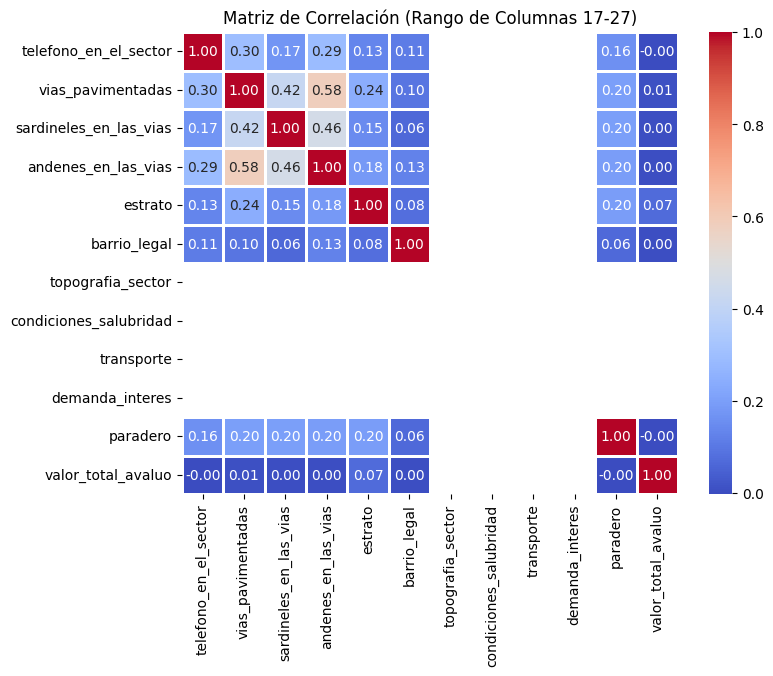

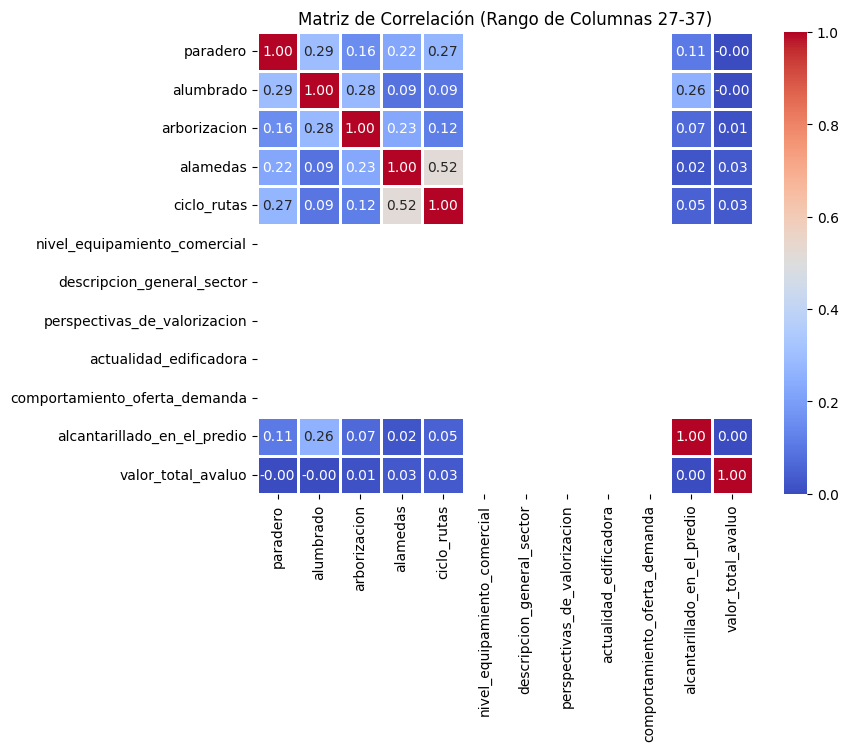

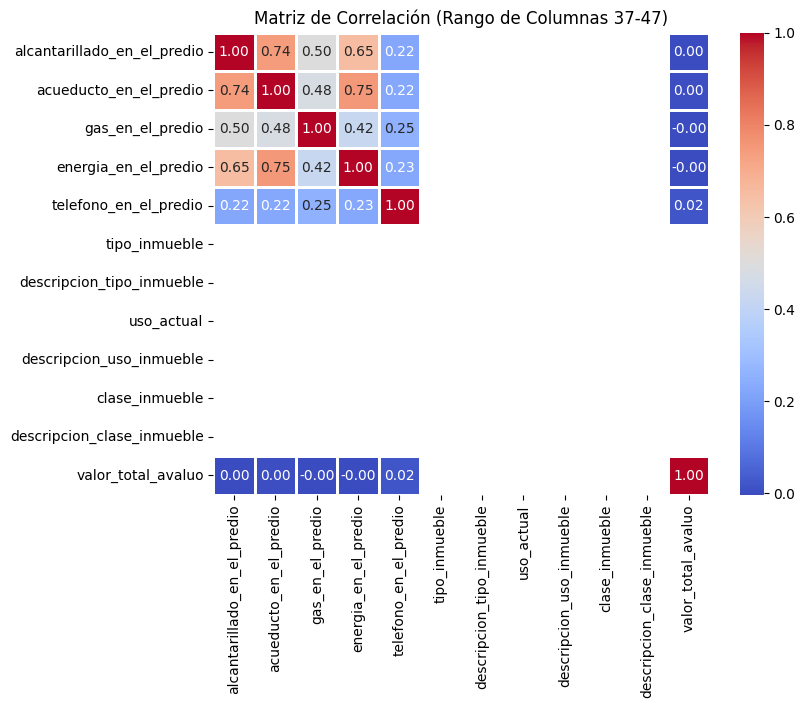

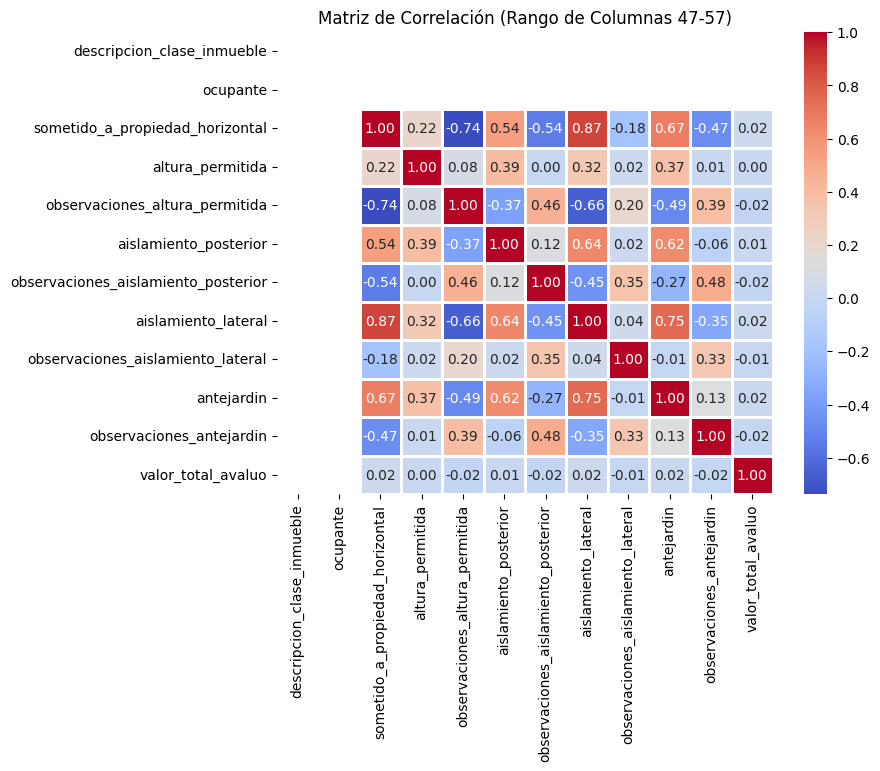

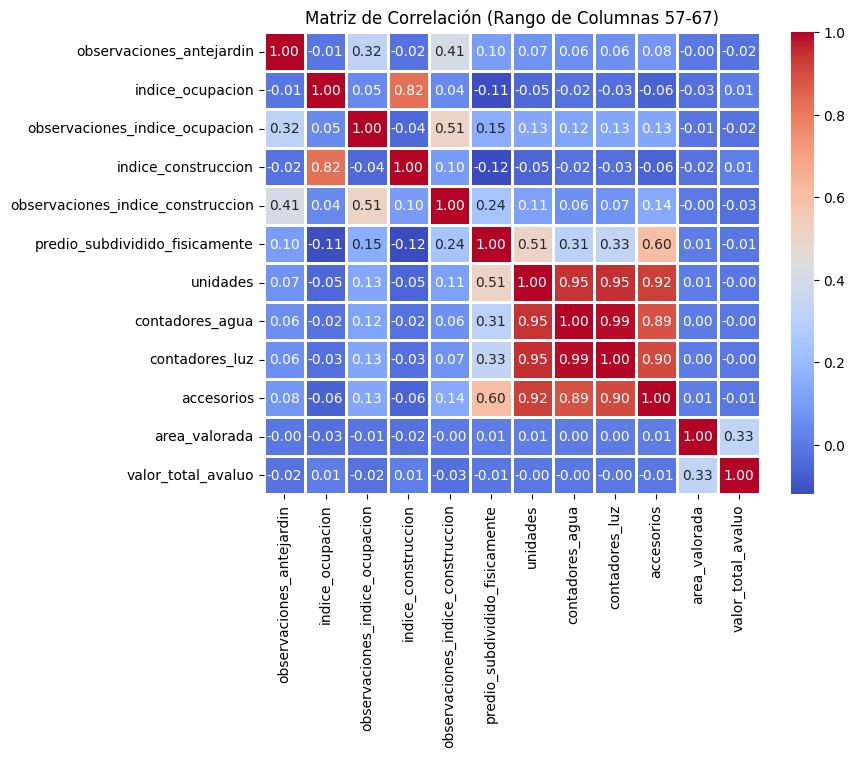

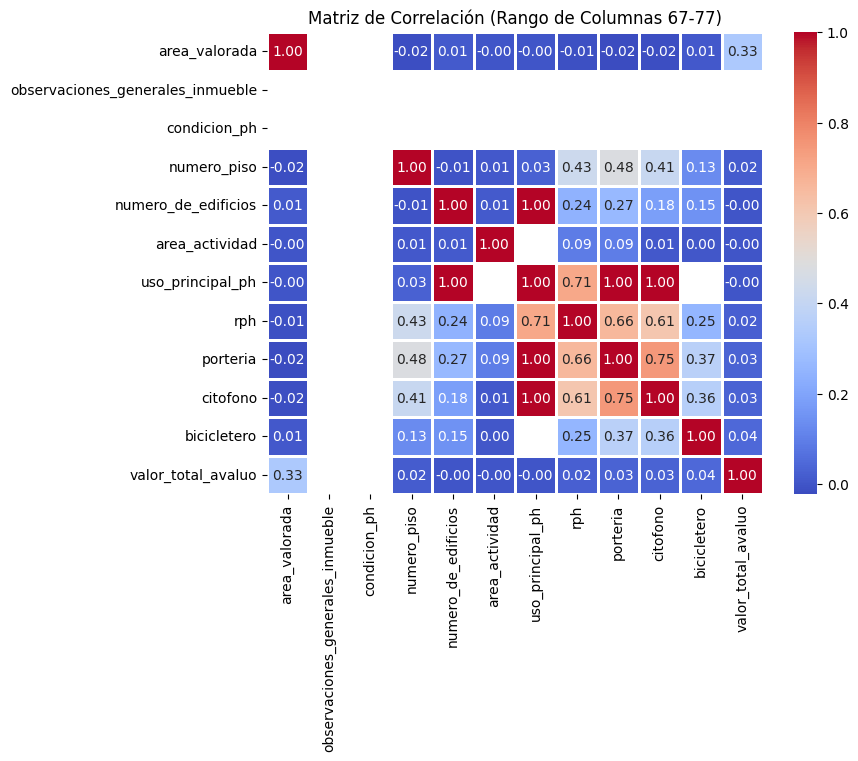

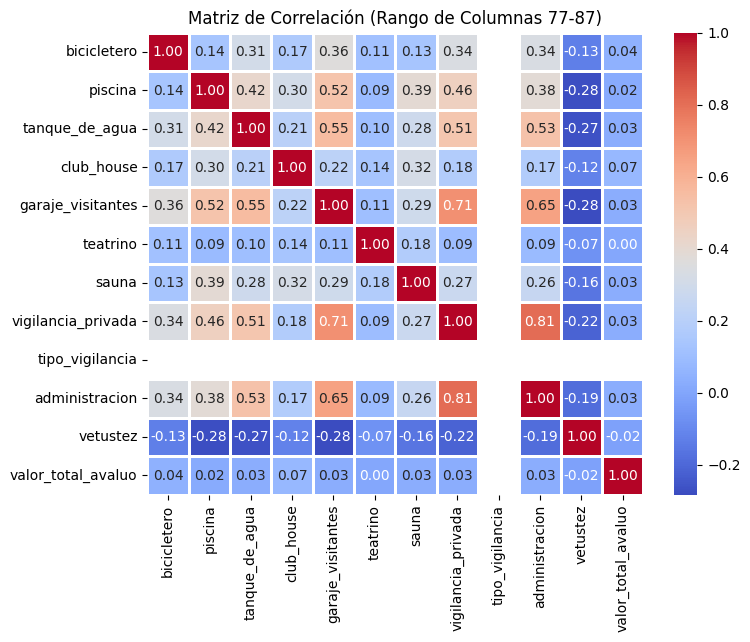

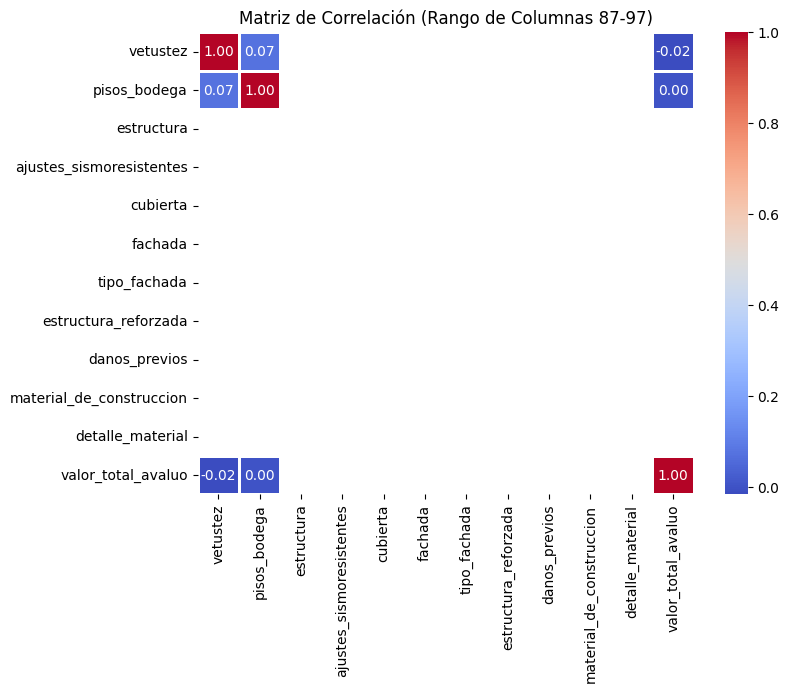

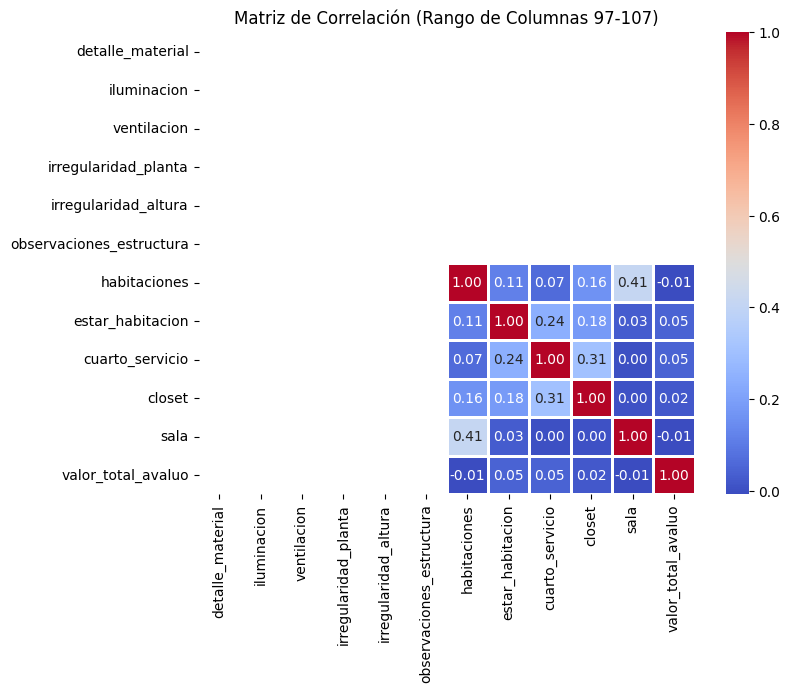

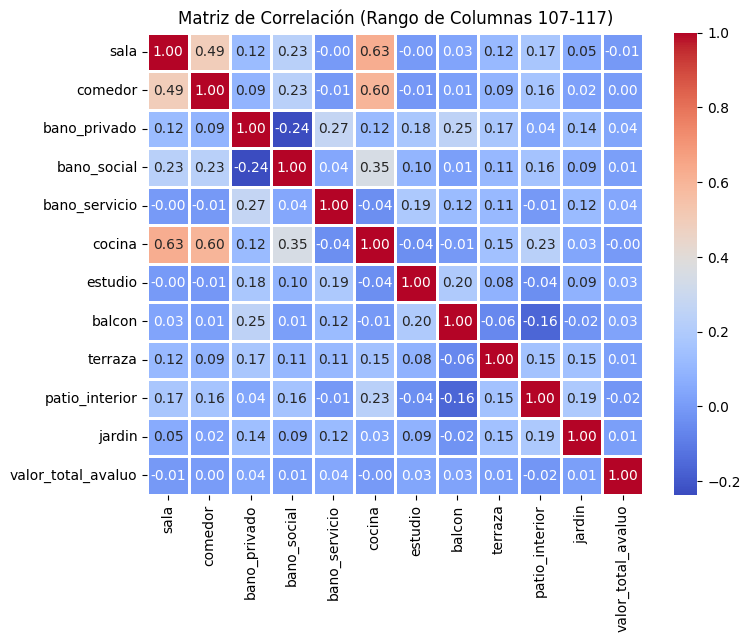

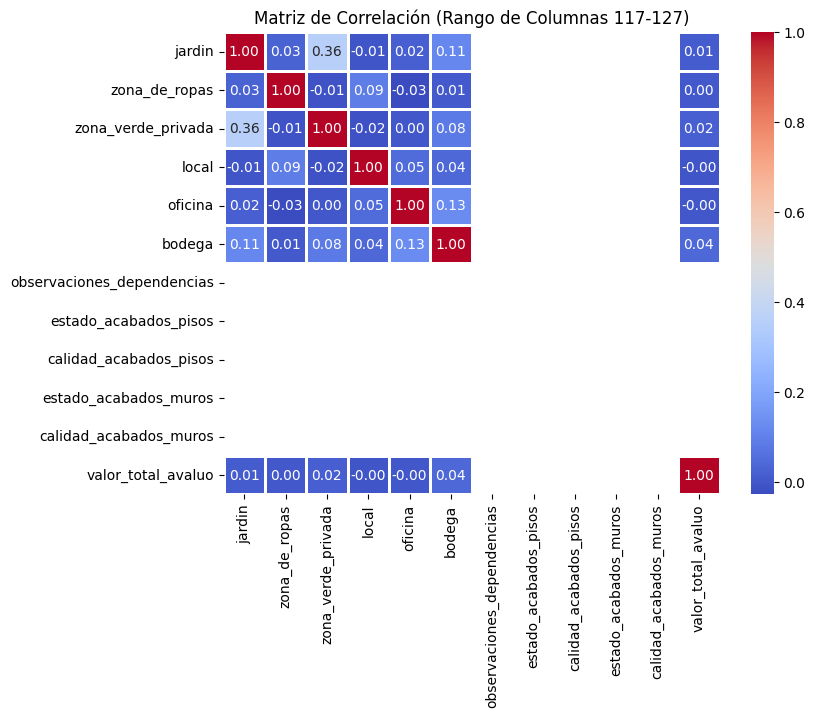

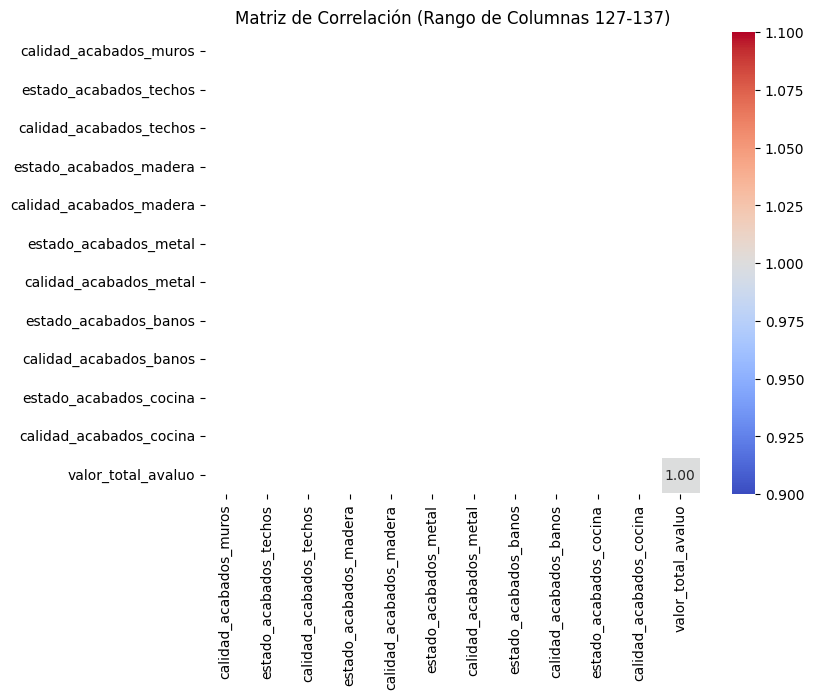

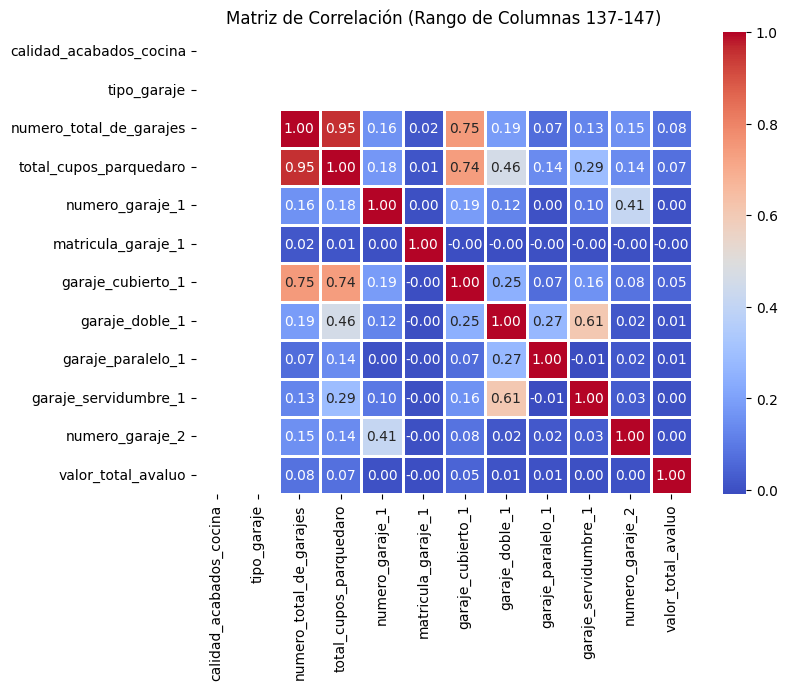

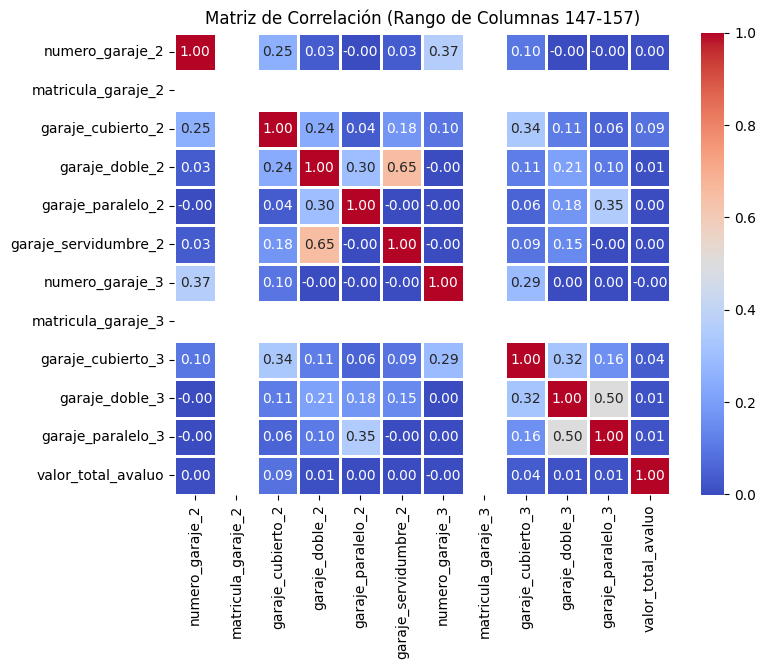

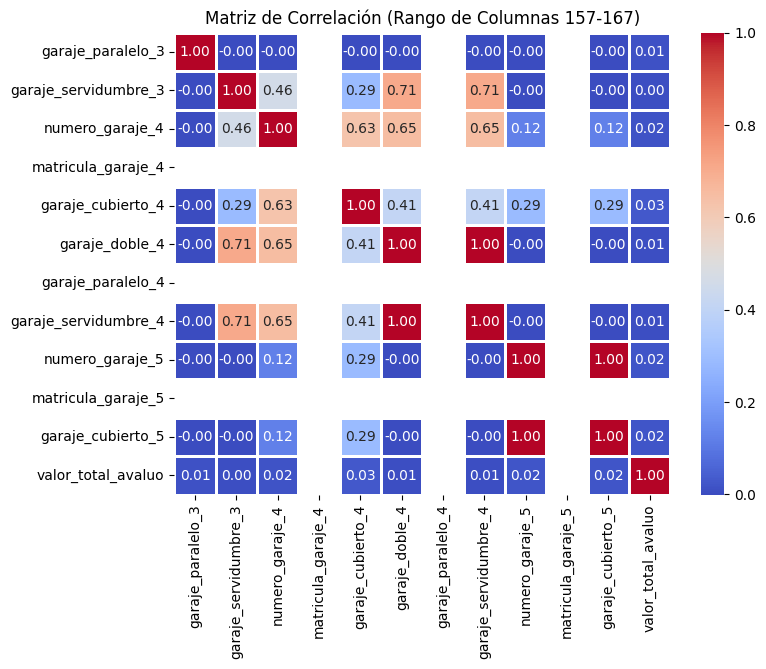

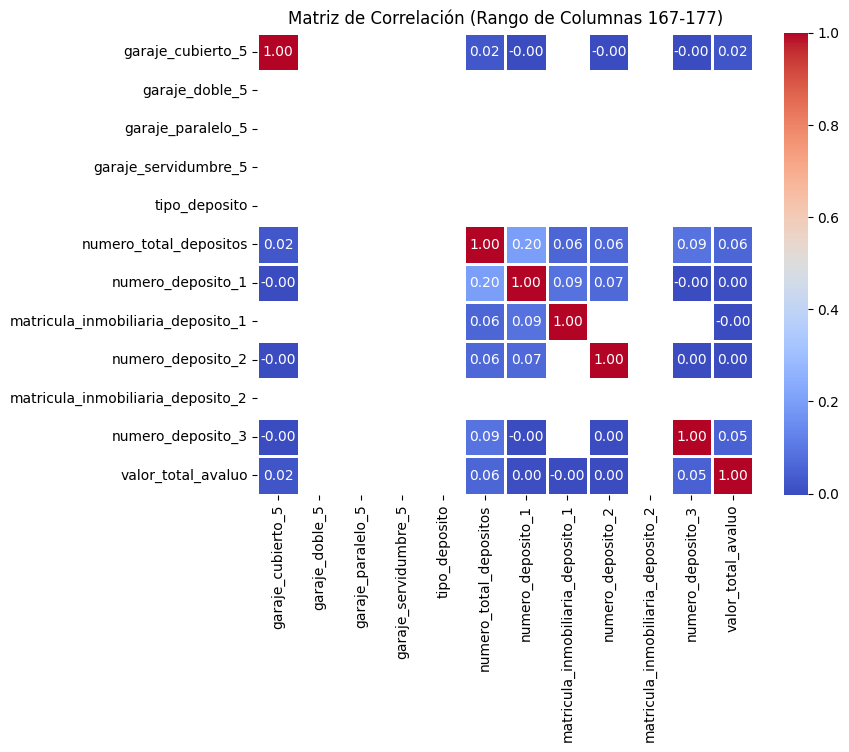

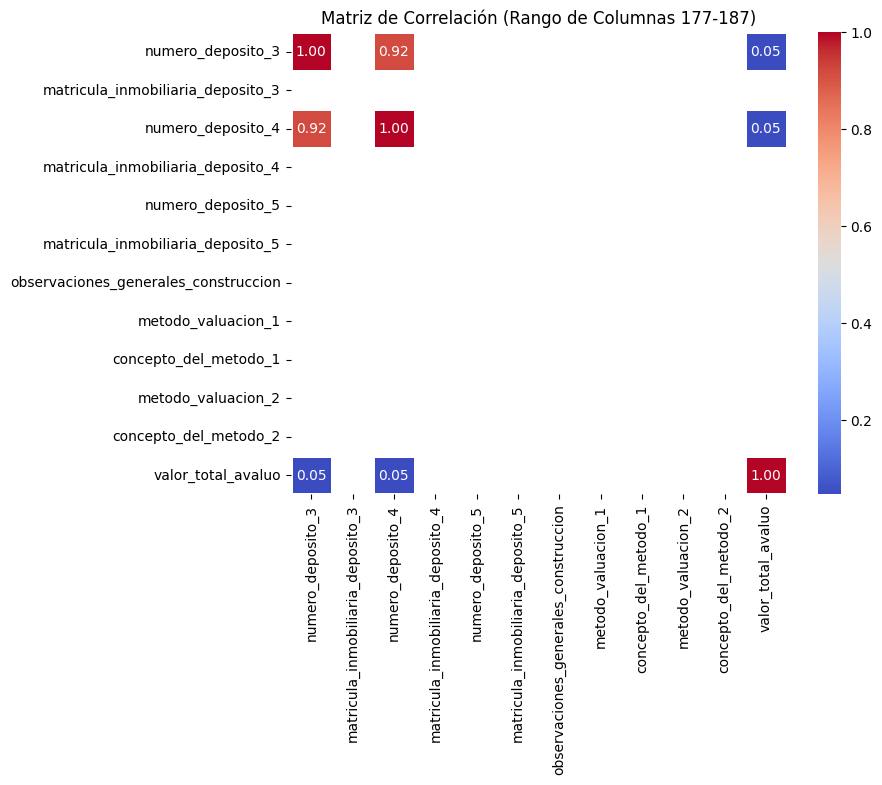

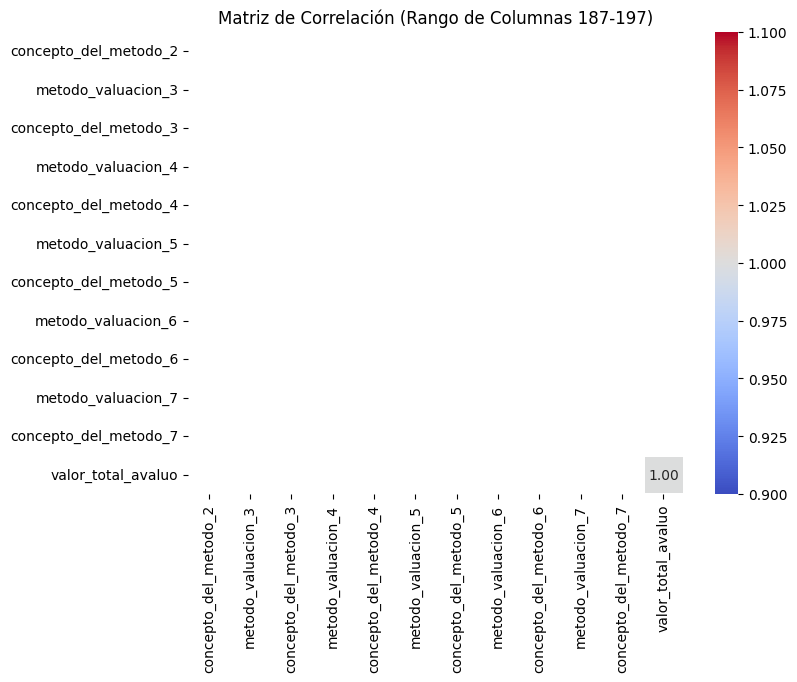

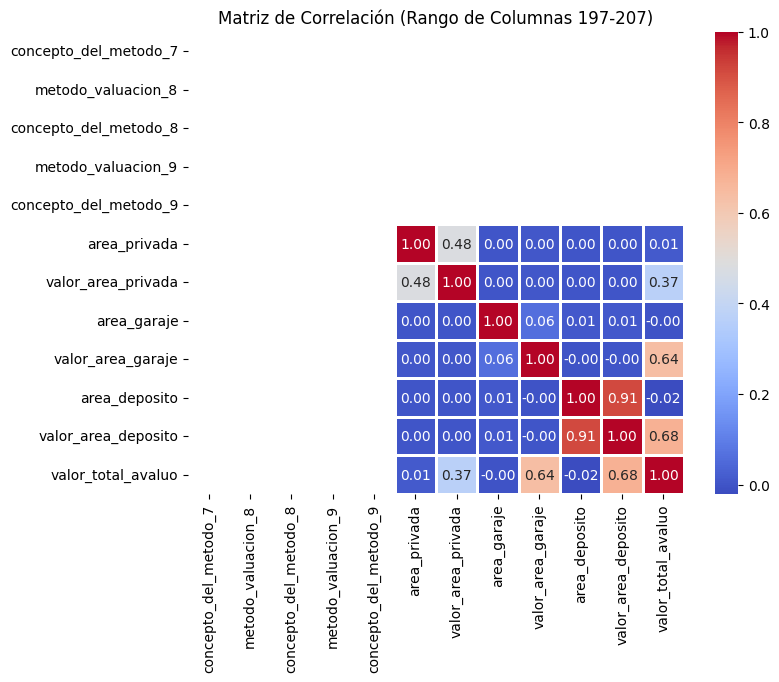

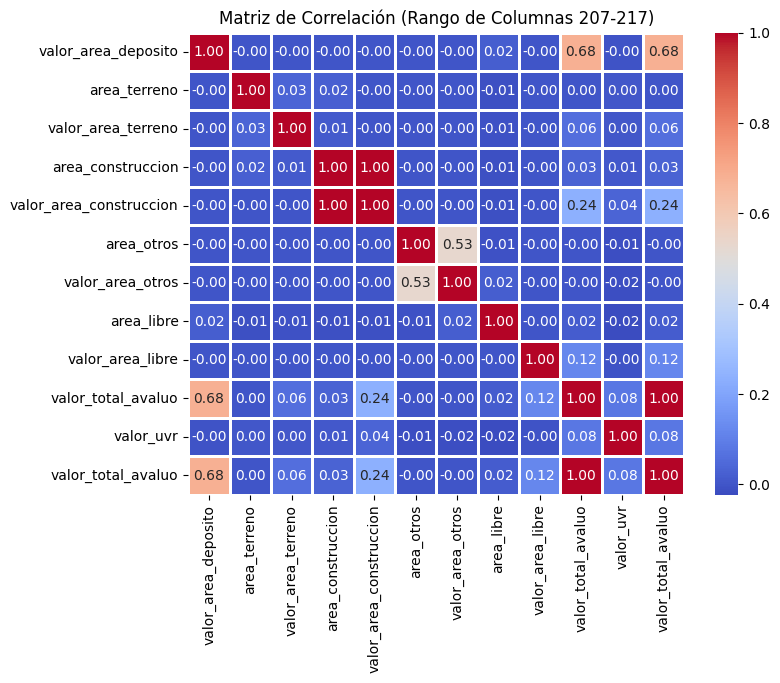

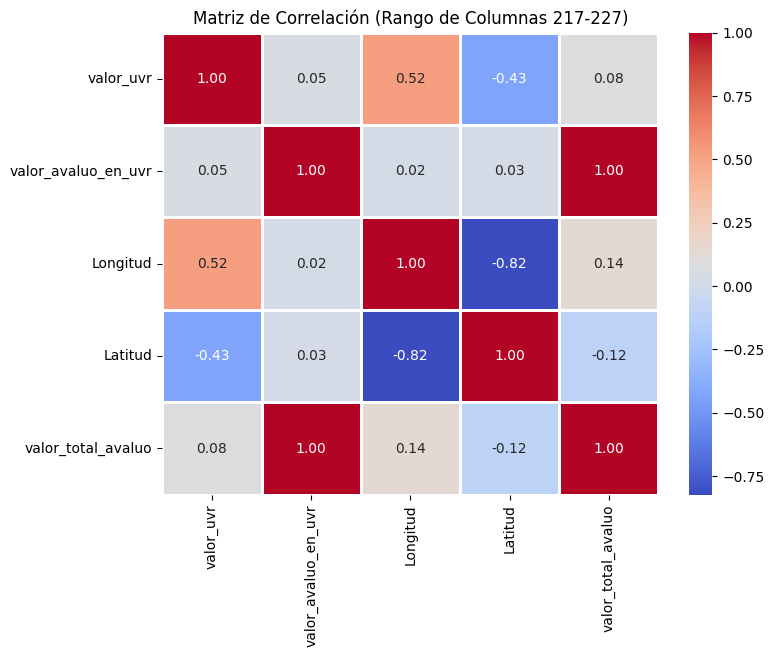

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Cargar el archivo CSV
file_path = 'train_precios_vivienda_clean.csv'  # Reemplaza 'tu_archivo.csv' con la ruta de tu archivo CSV
df = pd.read_csv(file_path, low_memory=False)

# Definir los rangos de columnas que deseas incluir en el análisis de correlación
column_ranges = [(13, 217)]  # Por ejemplo, tres rangos de columnas

# Iterar sobre los rangos de columnas y realizar el reemplazo de puntos por comas
''' for start, end in column_ranges:
    for columna in df.columns[start:end+1]:
        df[columna] = df[columna].astype(str).str.replace('.', ',') '''

# Iterar sobre las celdas de las columnas seleccionadas y convertir a numérico
for start, end in column_ranges:
    for columna in df.columns[start:end+1]:
        df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Guardar el DataFrame modificado a un nuevo archivo CSV
df.to_csv('train_precios_vivienda_clean_numerico.csv', index=False)


start_range = 7
end_range = 17
final_column = 217

# Iterar sobre los rangos de columnas y generar las gráficas de correlación
while start_range <= final_column:
    # Definir los rangos de columnas para cada iteración
    column_ranges_plot = [(start_range, end_range), (216, 216)]

    # Seleccionar las columnas para cada rango y concatenar los DataFrames resultantes
    selected_columns = []
    for start, end in column_ranges_plot:
        selected_columns.append(df.iloc[:, start:end+1])
    selected_df = pd.concat(selected_columns, axis=1)

    # Filtrar solo las columnas de tipo int
    selected_df = selected_df.select_dtypes(include=['int64', 'int32', 'float64'])

    # Obtener la matriz de correlación
    correlation_matrix = selected_df.corr()

    # Visualizar la matriz de correlación utilizando un mapa de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
    plt.title(f'Matriz de Correlación (Rango de Columnas {start_range}-{end_range})')
    plt.show()

    # Actualizar los rangos de columnas para la próxima iteración
    start_range += 10
    end_range += 10



In [72]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Cargar el archivo CSV
file_path = 'train_precios_vivienda_clean.csv'  # Reemplaza 'tu_archivo.csv' con la ruta de tu archivo CSV
df = pd.read_csv(file_path, low_memory=False)

# Definir los rangos de columnas que deseas incluir en el análisis de correlación
column_ranges = [(13, 217)]  # Por ejemplo, tres rangos de columnas

# Iterar sobre los rangos de columnas y realizar el reemplazo de puntos por comas
''' for start, end in column_ranges:
    for columna in df.columns[start:end+1]:
        df[columna] = df[columna].astype(str).str.replace('.', ',') '''

# Iterar sobre las celdas de las columnas seleccionadas y convertir a numérico
for start, end in column_ranges:
    for columna in df.columns[start:end+1]:
        df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Seleccionar las columnas para cada rango y concatenar los DataFrames resultantes
selected_columns = []
for start_range, end_range in column_ranges:
    selected_columns.append(df.iloc[:, start_range:end_range])
selected_df = pd.concat(selected_columns, axis=1)


# Obtener la matriz de correlación
correlation_matrix = selected_df.corr()

# Definir un umbral de correlación
umbral_correlacion = 0.1

# Crear una lista para almacenar las correlaciones que superen el umbral
correlaciones_superiores_umbral = []

# Iterar sobre las columnas de la matriz de correlación
for columna in correlation_matrix.columns:
    # Obtener la correlación con valor_total_avaluo para la columna actual
    correlacion = correlation_matrix.loc['valor_total_avaluo', columna]
    # Verificar si la correlación supera el umbral
    if abs(correlacion) > umbral_correlacion:
        # Agregar la correlación y el nombre de la columna a la lista
        correlaciones_superiores_umbral.append((correlacion, columna))

# Imprimir la lista de correlaciones que superan el umbral
for correlacion, columna in correlaciones_superiores_umbral:
    print(f"Correlación con {columna}: {correlacion}")

Correlación con area_valorada: 0.32795675705601696
Correlación con valor_area_privada: 0.369208838780483
Correlación con valor_area_garaje: 0.637285318613925
Correlación con valor_area_deposito: 0.6807439118011851
Correlación con valor_area_construccion: 0.23555336633279647
Correlación con valor_area_libre: 0.11883957800302421
Correlación con valor_total_avaluo: 1.0


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'train_precios_vivienda_clean.csv'  # Reemplaza 'tu_archivo.csv' con la ruta de tu archivo CSV
df = pd.read_csv(file_path, low_memory=False)

# Definir los rangos de columnas que deseas incluir en el análisis de correlación
column_ranges = [(13, 23)]
for i in range(23, 217, 10):
    column_ranges.append((i, min(i+9, 216)))  # Añade tuplas de columnas de 10 en 10 hasta la columna 216
column_ranges.append((216, 217))

# Iterar sobre los rangos de columnas y convertir los valores a numéricos, con errores coercitivos
for start, end in column_ranges:
    for columna in df.columns[start:end+1]:
        df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Seleccionar las columnas para cada rango y concatenar los DataFrames resultantes
for start_range, end_range in column_ranges:
    selected_columns = df.iloc[:, start_range:end_range+1]

    # Filtrar solo las columnas de tipo int
    selected_columns = selected_columns.select_dtypes(include=['int64', 'int32'])

    # Obtener la matriz de correlación
    correlation_matrix = selected_columns.corr()

    # Visualizar la matriz de correlación utilizando un mapa de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
    plt.title(f'Matriz de Correlación (Columnas {start_range}-{end_range})')
    plt.show()

KeyboardInterrupt: 